# what to do

- показати який відсоток населення підписав декларації у кожному населеному пункті (або районі); <br>
Для цього потрібно об'єднати полігони зі списком районів і даними перепису населення та парахувати. Все це
можна потім зобразити на ліфлетівській карті.<br>
- скільки отримує кожна лікарня за своїх пацієнтів, як збільшиться ця сума якщо решта жителів підпишуть декларація; <br>
- де є реальна конкуренція (тобто є приватні лікарні, ФОПи, та багато лікарів з яких можна обирати); <br>
Тупо порахувати <br>
- скільки людей змінило лікаря з яким підписало декларацію раніше; <br>
- яке співвідношення різних пацієнтів між лікарнями (або якщо будуть дані) лікарями; <br>

<br>
Від себе ще глянути як змінилися закупівлі лікарні залежно від зростання доходів;

Що я роблю зараз: <br>
- завантажую дані закупівель і дані єдати для того, щоб подивитися як вплинули надходження від НСЗУ на структуру витрат. Зараз у мене є json з одного і іншого, їх потрібно розпарсити в таблицю і отримати. CPV код, суму, дату і єдрпоу;


In [39]:
import pandas as pd
#prozorro = pd.read_json('data_short_line.json', dtype={'hospital_edrpou': 'str'})

payments = pd.read_excel('Виплати_до_11.04.19.xlsx',  dtype={'ЄДРПОУ': 'str'})
agreements = pd.read_excel('Укладені договори_березень.xlsx', dtype={'Код ЄДРПОУ': 'str'})
declarations = pd.read_excel('Декларації_в_законтрактованих_закладах_11_04_19.xlsx', dtype={'le_edrpou': 'str', 
                                                                                           'le_transfer': 'str'})
tender = pd.read_csv('tenders_export.csv', dtype={'edrpou': 'str'})

In [96]:
hosplital_tenders = prozorro.loc[prozorro.hospital_edrpou == '42204729']
hosplital_tenders[['item_description','id_item', 'sum']].groupby(['item_description', 'id_item'], as_index=False).sum().sort_values('sum', ascending=False)
# hosplital_tenders.loc[hosplital_tenders.item_description == 'Локальні мережі']
# hosplital_tenders

,item_description,id_item,sum
15,Медичні матеріали,33140000-3,6434018.60
16,"Пара, гаряча вода та пов’язана продукція",09320000-8,3495147.13
8,Електрична енергія,09310000-5,2466929.69
23,Системи для клінічних хімічних аналізів,33159000-9,1169856.90
26,Фармацевтична продукція,33600000-6,880580.00
2,Будівельні роботи та поточний ремонт,45000000-7,565233.87
22,Підгузки,33751000-9,352609.74
5,Гумові вироби,19510000-4,336666.40
10,Капітальний ремонт і реставрація,45453000-7,270475.00
25,Термочутливі папір або картон,22993200-9,259524.68


In [41]:
payments_2019 = payments.loc[payments['Рік'] == 2019]
tenders_2019 = prozorro.loc[prozorro.date > pd.to_datetime('2018.12.31')]

In [74]:
tenders_2019_sum = tenders_2019[['hospital_name', 'hospital_edrpou', 'sum']]\
    .groupby(['hospital_name', 'hospital_edrpou'], as_index=False) \
    .sum() \
    .sort_values('sum', ascending=False)

payments_2019_sum = payments_2019[['Назва закладу', 'ЄДРПОУ', 'Виплати']]\
    .groupby(['Назва закладу', 'ЄДРПОУ'], as_index=False) \
    .sum() \
    .sort_values('Виплати', ascending=False)

compare_money = pd.merge(tenders_2019_sum, payments_2019_sum, left_on='hospital_edrpou', right_on='ЄДРПОУ')

compare_money['compare_money_diff'] =  compare_money['Виплати'] - compare_money['sum']
compare_money['compare_money_ratio'] =  compare_money['Виплати']/compare_money['sum'] * 100

compare_money.sort_values('compare_money_ratio', ascending=False)
# compare_money.loc[compare_money.compare_money_diff < 0]


,hospital_name,hospital_edrpou,sum,Назва закладу,ЄДРПОУ,Виплати,compare_money_diff,compare_money_ratio
0,"КНП ""Сокальська ЦРЛ""",01997248,4.545364e+08,КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО СОКАЛЬСЬК...,01997248,8163354.50,-4.463730e+08,1.795974
1,"Комунальне некомерційне підприємство ""Золочівс...",01996272,3.528641e+08,"Комунальне некомерційне підприємство ""Золочівс...",01996272,6493357.83,-3.463707e+08,1.840187
2,Комунальне некомерційне підприємство Яворівськ...,20763289,2.999989e+08,КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ЯВОРІВСЬК...,20763289,6250903.63,-2.937479e+08,2.083643
3,"Комунальне некомерційне підприємство ""Центр пе...",38945065,2.743610e+08,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЦЕНТР ПЕ...",38945065,11750772.44,-2.626103e+08,4.282960
4,КОМУНАЛЬНЕ ПІДПРИЄМСТВО СТРИЙСЬКОЇ РАЙОННОЇ РА...,01107970,1.971550e+08,КОМУНАЛЬНЕ ПІДПРИЄМСТВО СТРИЙСЬКОЇ РАЙОННОЇ РА...,01107970,233328.15,-1.969217e+08,0.118348
5,КП Комунальне підприємство Стрийської районної...,01107970,4.568915e+06,КОМУНАЛЬНЕ ПІДПРИЄМСТВО СТРИЙСЬКОЇ РАЙОННОЇ РА...,01107970,233328.15,-4.335587e+06,5.106861
6,"Комунальне некомерційне підприємство ""Центр пе...",38945945,1.749937e+08,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЦЕНТР ПЕ...",38945945,11468999.71,-1.635247e+08,6.553952
9,"Комунальне некомерційне підприємство ""Радехівс...",01998101,1.437063e+08,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""РАДЕХІВС...",01998101,3554659.85,-1.401517e+08,2.473558
16,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""КОСІВСЬК...",01993546,7.477388e+07,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""КОСІВСЬК...",01993546,4425094.43,-7.034878e+07,5.917969
25,"Комунальне некомерційне підприємство ""Чернігів...",14242161,5.114305e+07,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЧЕРНІГІВ...",14242161,2264768.15,-4.887828e+07,4.428301


In [6]:
declarations[['le_name', 'doctor_full_name', 'division_name']] \
    .groupby(['le_name', 'division_name'], as_index=False).size() \
    .to_frame('size') \
    .sort_values('size', ascending=False)


,,size
le_name,division_name,
"комунальне некомерційне підприємство ""4-а міська поліклініка м. Львова""","Львів, 4-та міська поліклініка (Сихівський р-н), корпус №1",183
"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЦЕНТРАЛЬНА МІСЬКА ЛІКАРНЯ М.БОРИСЛАВА"" БОРИСЛАВСЬКОЇ МІСЬКОЇ РАДИ",відділення ПМСД,171
"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЧЕРНІГІВСЬКА МІСЬКА ЛІКАРНЯ № 1"" ЧЕРНІГІВСЬКОЇ МІСЬКОЇ РАДИ",Відділення по наданню первинної медичної допомоги населенню 3п/в,169
"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЦЕНТР ПЕРВИННОЇ МЕДИКО-САНІТАРНОЇ ДОПОМОГИ"" КОРОСТЕНСЬКОЇ МІСЬКОЇ РАДИ","КНП ""ЦПМСД"" КМР",168
"комунальне некомерційне підприємство ""4-а міська поліклініка м. Львова""","Львів, 4-та міська поліклініка (Сихівський р-н), корпус №2",162
КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО «МІСЬКА ПОЛІКЛІНІКА № 6» ХАРКІВСЬКОЇ МІСЬКОЇ РАДИ,Центр надання первинної медичної допомоги,157
"Комунальне некомерційне підприємство ""Міська студентська лікарня"" Харківської міської ради",Центр первинної медико-санітарної допомоги,139
"Комунальне некомерційне підпиємство ""Міська поліклініка №2"" Чернівецької міської ради","КНП ""МІСЬКА ПОЛІКЛІНІКА "" 2",129
"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЧЕРНІГІВСЬКА МІСЬКА ЛІКАРНЯ №2"" ЧЕРНІГІВСЬКОЇ МІСЬКОЇ РАДИ","Амбулаторія 1 Відділення первинної медичної допомоги поліклініки комунального некомерційного підприємства ""Чернігівська міська лікарня №2"" Чернігівської міської ради",123


In [155]:
nsh = payments[['ЄДРПОУ', 'Назва закладу', 'Виплати']].groupby(['ЄДРПОУ', 'Назва закладу'], as_index=False).sum()
procurements = tender[['edrpou', 'buyer_name', 'volume_uah']].groupby(['edrpou', 'buyer_name'], as_index=False).sum()

In [185]:
total_money.loc[total_money['Виплати'] < total_money['volume_uah']].sort_values('volume_uah', ascending=False)

,ЄДРПОУ,Назва закладу,Виплати,edrpou,buyer_name,volume_uah
102,14307794,"ПУБЛІЧНЕ АКЦІОНЕРНЕ ТОВАРИСТВО ""МОТОР СІЧ""",3048824.66,14307794,АТ Мотор Січ,3.107984e+08
56,02007101,КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ЛЬВІВСЬКО...,56622.33,02007101,Комунальне некомерційне підприємство Львівсько...,2.994290e+08
99,14233274,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЧЕРНІГІВ...",13674161.79,14233274,КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО «ЧЕРНІГІВ...,2.410638e+08
8,01982940,КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО КОВЕЛЬСЬК...,25435391.51,01982940,Комунальне некомерційне підприємство Ковельськ...,2.302572e+08
33,01998035,Комунальне некомерційне підприємство Пустомиті...,7699341.17,01998035,Комунальне некомерційне підприємство Пустомит...,2.102313e+08
267,37803043,"КОМУНАЛЬНЕ ПІДПРИЄМСТВО ""ЦЕНТР ПЕРВИННОЇ МЕДИК...",26705545.32,37803043,Комунальне підприємство Центр первинної медик...,1.821325e+08
55,02006596,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ЧЕРНІГІВ...",20743479.50,02006596,"КНП ""Чернігівська міська лікарня №1"" Чернігівс...",1.426517e+08
58,02007532,КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО КОНОТОПСЬ...,6766967.67,02007532,КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО КОНОТОПСЬ...,1.358651e+08
52,02004120,Комунальне некомерційне підприємство «Херсонсь...,12392052.73,02004120,"Комунальний заклад ""Херсонська міська клінічн...",1.339544e+08
88,05396876,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ХЕРСОНСЬ...",11340918.55,05396876,"КОМУНАЛЬНЕ НЕКОМЕРЦІЙНЕ ПІДПРИЄМСТВО ""ХЕРСОНСЬ...",1.182102e+08


In [162]:
total_money = pd.merge(nsh, procurements, left_on="ЄДРПОУ", right_on="edrpou")
(total_money['Виплати']/total_money['volume_uah'] * 100).describe()

count    9.130000e+02
mean     1.399496e+03
std      3.460440e+04
min      1.925162e-03
25%      4.652515e+01
50%      1.032307e+02
75%      2.273442e+02
max      1.045611e+06
dtype: float64

In [285]:
 declarations[['division_region', 'doctor_full_name']].groupby(['division_region'], as_index=False) \
    .size().to_frame('size') \
    .sort_values('size', ascending=False) 



,size
division_region,
ТЯЧІВСЬКИЙ,516
ХАРКІВСЬКИЙ,451
ПУСТОМИТІВСЬКИЙ,373
КИЄВО-СВЯТОШИНСЬКИЙ,356
ЯВОРІВСЬКИЙ,343
ГОРОДОЦЬКИЙ,330
ХУСТСЬКИЙ,318
ІРШАВСЬКИЙ,303
НОВОСЕЛИЦЬКИЙ,301


In [162]:
money_paid = payments[['ЄДРПОУ', 'Назва закладу', 'Виплати']] \
    .groupby(['ЄДРПОУ', 'Назва закладу'], as_index=False) \
    .sum().sort_values('Виплати', ascending=False)

patients_registered = declarations[['le_name', 'decl_count', 'le_edrpou']] \
    .groupby(['le_name', 'le_edrpou'], as_index=False) \
    .sum().sort_values(by='decl_count', ascending=False)

tender_money = tender[['edrpou', 'buyer_name', 'volume_uah']] \
    .groupby(['buyer_name', 'edrpou'], as_index=False).sum() \
    .sort_values('volume_uah', ascending=False)


In [195]:
merged_money_patients = pd.merge(patients_registered, money_paid, left_on='le_edrpou', right_on='ЄДРПОУ')
merged_tenders_patients = pd.merge(patients_registered, tender_money, left_on='le_edrpou', right_on='edrpou')

merged_tenders_money = pd.merge(money_paid, tender_money, left_on='ЄДРПОУ', right_on='edrpou')

In [228]:
merged_tenders_money['volume_uah'].values.

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

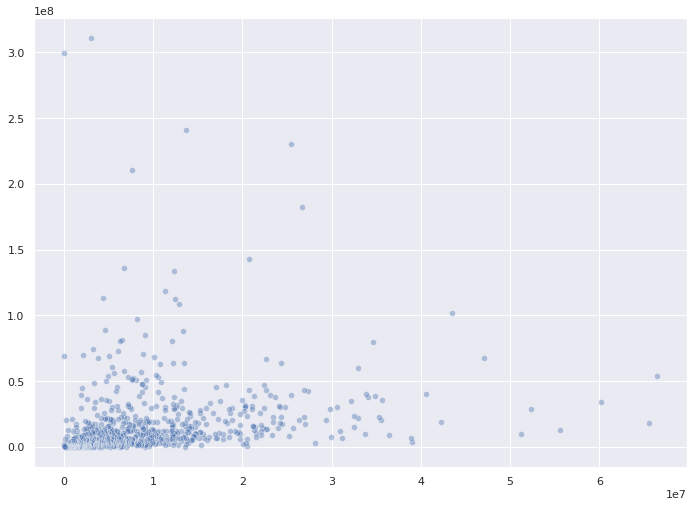

In [198]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# sns.set_style("darkgrid")
ax = sns.scatterplot(x=merged_tenders_money['Виплати'].values, 
                     y=merged_tenders_money['volume_uah'].values,
                     alpha=0.4
                    )
# ax.axes.set_ylim(0,0.2e9)

# ax.set_yscale('linear')
# ax.set_xscale('linear')
# plt.show()

In [208]:
payments[['ЄДРПОУ', 'Назва закладу', 'Виплати']]


numpy.int64

In [166]:
# тобто першим елементом вказано або Київ, або райони Києва, або область

[d[0] for d in declarations.division_address.str.split(', ') if 
 ('КИЇВ' not in d[0]) and ('область' not in d[0]) and ('район' not in d[0])]

[]

In [170]:
# якщо другим елементом в адресі йде вулиця - значить це Київ - усі інші райони
check = [d[0] + " " + d[1] for d in declarations.division_address.str.split(', ') if 'вул' in d[1] ]
[d for d in check if 'КИЇВ' not in d]

[]

In [241]:
len(declarations.division_address)

a = len([d[1] for d in declarations.division_address.str.split(', ') if ('вул' in d[1])])
b = len([d[1] for d in declarations.division_address.str.split(', ') if ('м.' in d[1])])
c = len([d[1] for d in declarations.division_address.str.split(', ') if ('район' in d[1])])


# всі можливі варіанти за якими можна класифікувати на Київ,
# райони Києва, міста, райони областей і смт.ЗАБОЛОТІВ, с.ШЕВЧЕНКОВЕ та с.ШЕВЧЕНКОВЕ
[d[1] for d in declarations.loc[[True for d in declarations.division_address.str.split(', ') 
                  if ('вул' not in d[1]) 
                  and ('м.' not in d[1]) 
                  and ('район' not in d[1])]].division_address.str.split(', ')
                                         if ('вул' not in d[1]) 
                                          and ('м.' not in d[1]) 
                                          and ('район' not in d[1])]

['смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'смт.ЗАБОЛОТІВ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ШЕВЧЕНКОВЕ',
 'с.ТРОСТЯНЕЦЬ']

In [202]:
list(set([d[1] for d in declarations.division_address.str.split(', ')]) - set(t))

['вулиця Закревського ',
 'вулиця Ярославська',
 'вулиця Васильченка',
 'вулиця Академіка Булаховського',
 'вулиця Петра Запорожця',
 'вулиця академіка Корольова',
 'вулиця Новопирогівська',
 'вулиця Велика Васильківська',
 'вулиця Академіка Стражеска',
 'вулиця Столичне шосе',
 'вулиця Левка Мацієвича',
 'вулиця Симиренко',
 'вулиця Гарматна',
 'вулиця Професора Підвисоцького',
 'вулиця Червоноткацька',
 'вулиця Драй Хмари',
 'вулиця Академіка Корольова',
 'вулиця Мостицька',
 'вулиця Північна',
 'вулиця Сергієнка',
 'вулиця Академіка Курчатова',
 'вулиця Олександра Мишуги',
 'вулиця Академіка Єфремова',
 'вулиця Івана Дяченка',
 'вулиця Полкова',
 'вулиця Заболотного академіка',
 'вулиця Олени Теліги',
 'вулиця Курчатова',
 'вулиця Івана Мазепи',
 'вулиця Машинобудівна',
 'вулиця Отця Журавського',
 'вулиця Туровська',
 'вулиця Салютна',
 'вулиця Бударіна',
 'вулиця Закревського',
 'вулиця Новаторів',
 'вулиця Курнатовського',
 'вулиця Двінська',
 'вулиця Вереснева',
 'вулиця Йорданс

In [132]:
tender_not_null = tender[~tender.prozorro_purchase_id.isnull()]

In [134]:
# import requests
cpv_urls = ["https://public.api.openprocurement.org/api/2.5/tenders/{}".format(i) for i in tender_not_null.prozorro_purchase_id]
# items = [requests.get(i).json()["data"]["items"] for i in cpv_urls]

KeyboardInterrupt: 

In [158]:
cpv_urls = pd.DataFrame(pd.Series(cpv_urls))
cpv_urls.to_csv('cpv_urls', index=False, header=False)

In [52]:
edrpou_in_decl = set(list(declarations.le_transfer) + list(declarations.le_edrpou))

In [53]:
edrpou_in_aggr = agreements.loc[agreements['Тип власності'] != 'ФОП', 'Код ЄДРПОУ']

In [43]:
len(edrpou_in_decl)

1129

In [63]:
full = set( list(edrpou_in_aggr) + list(edrpou_in_decl))

In [71]:
pd.Series(list(full)).values

array(['36753285', '32120543', '42175646', ..., '40314763', '38584715',
       '41012405'], dtype=object)

In [76]:
list_of_all_edrpou = pd.DataFrame(pd.Series(list(full)))

list_of_all_edrpou.to_csv('list_of_all_edrpou.csv', index=False, header=False)

# prozorro data

In [1]:
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [40]:
prozorro = pd.read_json('data_short_line.json', dtype={'hospital_edrpou': 'str'})
prozorro['id_item_short'] = prozorro.id_item.str[:2]

In [20]:
prozorro

,date,hospital_edrpou,hospital_name,id,id_item,item_description,overal_title,quantity,scheme,sum,unit,unit_code,id_item_short
0,2019-02-28 09:42:53.883089,36753285,"КНП ""Берегометський центр первинної медико-сан...",ff7bbd40f04a4f72bce29454b9ff50ad,33120000-7,Системи реєстрації медичної інформації та досл...,"Медобладнання - електрокардіограф - 2 шт., ліх...",2.0,ДК021,40480.00,шт,H87,33
1,2019-02-28 09:42:53.883089,36753285,"КНП ""Берегометський центр первинної медико-сан...",ff7bbd40f04a4f72bce29454b9ff50ad,33120000-7,Системи реєстрації медичної інформації та досл...,"Медобладнання - електрокардіограф - 2 шт., ліх...",10.0,ДК021,40480.00,шт,H87,33
2,2019-02-28 09:42:53.883089,36753285,"КНП ""Берегометський центр первинної медико-сан...",ff7bbd40f04a4f72bce29454b9ff50ad,33120000-7,Системи реєстрації медичної інформації та досл...,"Медобладнання - електрокардіограф - 2 шт., ліх...",10.0,ДК021,40480.00,шт,H87,33
3,2019-01-31 11:39:22.659515,36753285,"КНП ""Берегометський центр первинної медико-сан...",268b442efb2b4a8081de532c21b1cc43,09310000-5,Електрична енергія,Електрична енергія,17111.0,ДК021,50068.00,кВт*год,KWH,09
4,2018-12-28 09:36:34.510633,36753285,"КНП ""Берегометський центр первинної медико-сан...",6341913a3024475baf7aacca2efbf2e5,33120000-7,Системи реєстрації медичної інформації та досл...,Системи реєстрації медичної інформації та досл...,40.0,ДК021,40820.00,шт,H87,33
5,2018-12-28 09:36:34.510633,36753285,"КНП ""Берегометський центр первинної медико-сан...",6341913a3024475baf7aacca2efbf2e5,33120000-7,Системи реєстрації медичної інформації та досл...,Системи реєстрації медичної інформації та досл...,40.0,ДК021,40820.00,шт,H87,33
6,2018-12-28 09:36:34.510633,36753285,"КНП ""Берегометський центр первинної медико-сан...",6341913a3024475baf7aacca2efbf2e5,33120000-7,Системи реєстрації медичної інформації та досл...,Системи реєстрації медичної інформації та досл...,40.0,ДК021,40820.00,шт,H87,33
7,2018-12-28 09:36:34.510633,36753285,"КНП ""Берегометський центр первинної медико-сан...",6341913a3024475baf7aacca2efbf2e5,33120000-7,Системи реєстрації медичної інформації та досл...,Системи реєстрації медичної інформації та досл...,40.0,ДК021,40820.00,шт,H87,33
8,2018-12-28 09:36:34.510633,36753285,"КНП ""Берегометський центр первинної медико-сан...",6341913a3024475baf7aacca2efbf2e5,33120000-7,Системи реєстрації медичної інформації та досл...,Системи реєстрації медичної інформації та досл...,4.0,ДК021,40820.00,уп,PK,33
9,2018-12-28 09:36:34.510633,36753285,"КНП ""Берегометський центр первинної медико-сан...",6341913a3024475baf7aacca2efbf2e5,33120000-7,Системи реєстрації медичної інформації та досл...,Системи реєстрації медичної інформації та досл...,20.0,ДК021,40820.00,уп,PK,33


In [200]:
payments.groupby(['Місяць', 'Рік']).size()

Місяць    Рік 
березень  2019    1216
вересень  2018     161
грудень   2018     623
жовтень   2018     623
липень    2018     161
листопад  2018     623
лютий     2019    1184
серпень   2018     161
січень    2019    1185
dtype: int64

In [225]:
2.466900e+05, 649032.33

(246690.0, 649032.33)

In [240]:
a = prozorro.loc[(prozorro.date > pd.to_datetime("2019-03-01")) & (prozorro.date < pd.to_datetime("2019-04-01"))]
b = payments.loc[(payments['Рік'].astype(str) == '2019') & (payments['Місяць'] == 'березень')]

c = a[['hospital_edrpou', 'sum']].groupby('hospital_edrpou', as_index=False).sum()
d = b[['ЄДРПОУ', 'Виплати']].groupby('ЄДРПОУ', as_index=False).sum()
c['hospital_edrpou'] = c['hospital_edrpou'].astype('str')

difference = pd.merge(c,d, left_on="hospital_edrpou", right_on='ЄДРПОУ')

difference['rate'] = difference['Виплати']/difference['sum']*100
difference.sort_values('rate')

,hospital_edrpou,sum,ЄДРПОУ,Виплати,rate
47,26353612,1.130000e+05,26353612,0.00,0.000000
10,20763289,2.890125e+08,20763289,2045862.21,0.707880
515,42012846,1.329775e+07,42012846,155545.34,1.169712
117,37555384,3.598200e+07,37555384,1133959.17,3.151462
14,20764294,3.515900e+07,20764294,1806580.67,5.138316
4,14242161,1.465718e+07,14242161,767041.80,5.233214
49,26418688,2.942062e+07,26418688,1735727.50,5.899697
199,38043234,7.410644e+06,38043234,471481.34,6.362218
321,38593656,1.571592e+07,38593656,1009201.17,6.421520
428,39028882,1.751334e+07,39028882,1244810.01,7.107782


In [136]:
plot_data = prozorro[['date', 'sum']].groupby(['date'], as_index=False).sum()
plot_data['sum'] = plot_data['sum']/plot_data['sum'].max()

In [137]:
main_tenders = prozorro.loc[[True if d in ['33', '09', '30', '44', '39', '45', '15', '24'] else False for d in prozorro.id_item_short]]
main_tenders['id_item_short'] = "type:" + main_tenders.id_item_short
main_tenders = main_tenders[~main_tenders.date.isnull()]

main_tenders['year_month'] = pd.to_datetime(main_tenders.date.map(lambda x: str(x.year) + "-" + str(x.month)), format="%Y-%m")




/home/ptrbdr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
['33', '09', '30', '44', '39', '45', '15', '24']

/home/ptrbdr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ptrbdr/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


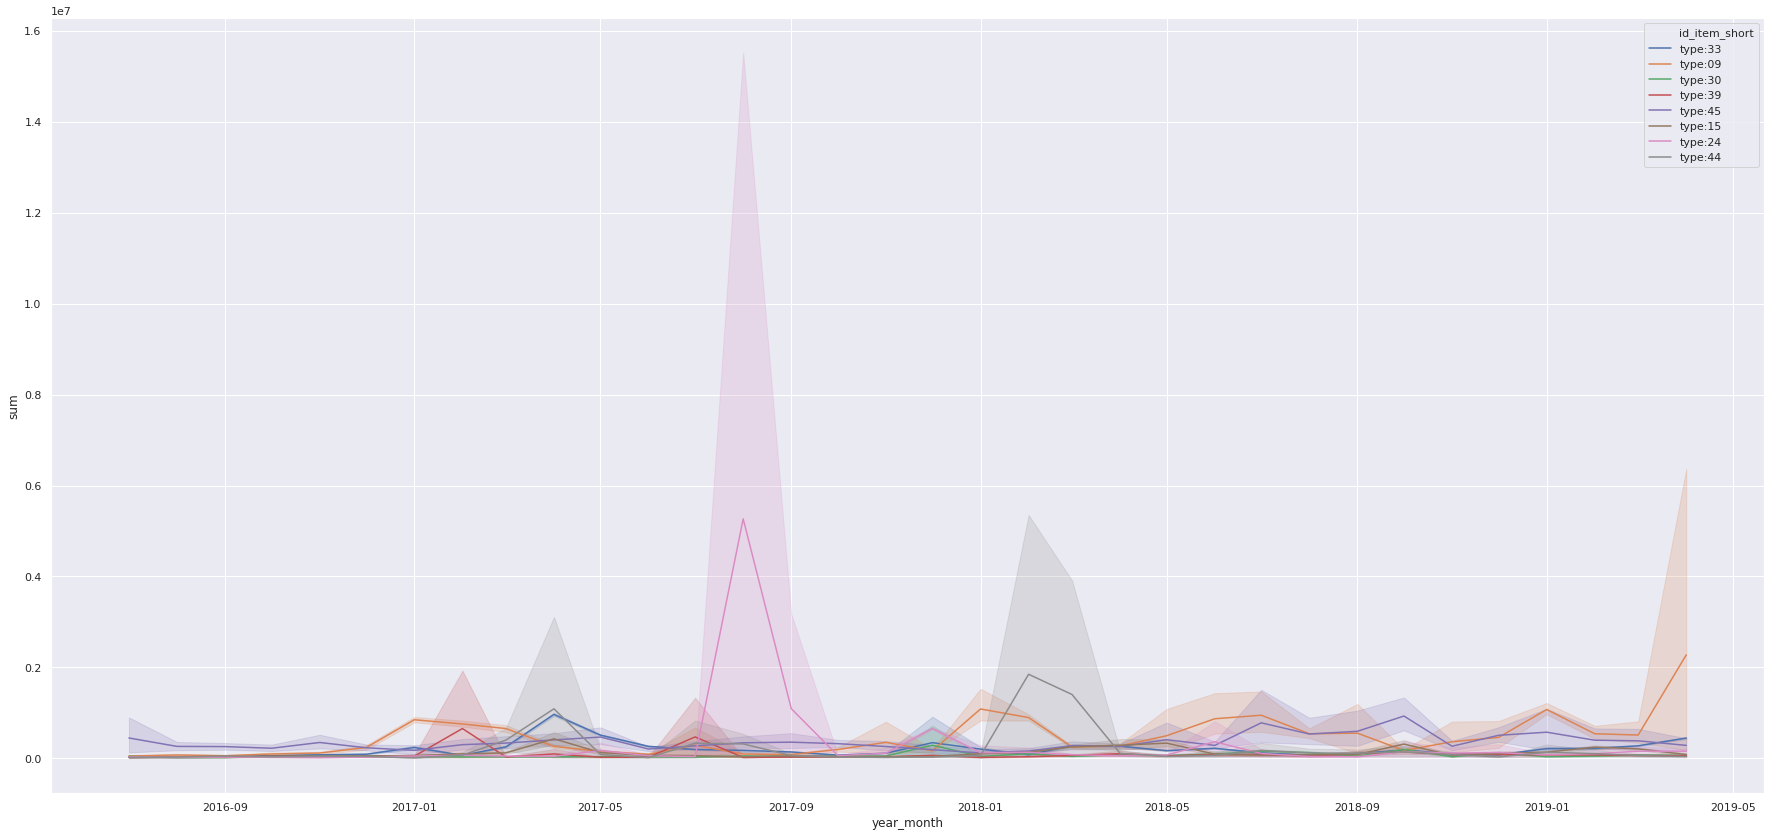

In [146]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30.7,14.27)})


main_tenders = prozorro.loc[[True if d in ['33', '09', '30', '44', '39', '45', '15', '24'] else False for d in prozorro.id_item_short]]
main_tenders['id_item_short'] = "type:" + main_tenders.id_item_short
main_tenders = main_tenders[~main_tenders.date.isnull()]

main_tenders['year_month'] = pd.to_datetime(main_tenders.date.map(lambda x: str(x.year) + "-" + str(x.month)), format="%Y-%m")




ax = sns.lineplot(
                  x="year_month", 
                  y="sum", 
                  hue="id_item_short", 
                  data=main_tenders
                 )

# ax.set_yscale('log')


In [147]:
prozorro[['sum', 'id_item']].groupby('id_item', as_index=False).sum().sort_values('sum', ascending=False)

,id_item,sum
747,33600000-6,1.220699e+10
75,09320000-8,5.132637e+09
52,09120000-6,1.648638e+09
74,09310000-5,1.500107e+09
599,33110000-4,8.917097e+08
340,24450000-3,6.409319e+08
315,24310000-0,5.316717e+08
56,09130000-9,4.984677e+08
818,33690000-3,4.900385e+08
640,33140000-3,4.710567e+08


In [4]:
main_tenders = prozorro.loc[[True if d in ['33', '09', '30', '44', '39', '45', '15', '24'] else False for d in prozorro.id_item_short]]
main_tenders = main_tenders.sort_values('date')

In [45]:
build_tenders = prozorro.loc[[True if d in ['44'] else False for d in prozorro.id_item_short]]
build_tenders['', 'hospital_name']

,date,hospital_edrpou,hospital_name,id,id_item,item_description,overal_title,quantity,scheme,sum,unit,unit_code,id_item_short
260,2018-09-24 13:46:58.183619,42204729,"Комунальне некомерційне підприємство ""Центр пе...",aa4f17c465624c818c848acaf919ea84,44221000-5,"Вікна, двері та супутні вироби","Вікна, двері та супутні вироби",7.0,ДК021,64952.00,штуки,H87,44
537,2018-10-23 11:02:44.719688,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",b491271cd1954f51a6c0cffe2c607b87,44112230-9,Лінолеум,Лінолеум,90.0,ДК021,15300.00,метр квадратний,MTK,44
546,2018-10-10 12:08:07.193513,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",f8908a1e903e4c8faf0b1367891d0529,44170000-2,"Плити, листи, стрічки та фольга, пов’язані з к...",Плита OSB KRONO Плита ОСБ-3 2500x1250x15 мм. ...,29.0,ДК021,15000.00,штука,H87,44
548,2018-10-04 11:57:05.101261,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",8e157187be644c01a3b8cef5ef87e290,44410000-7,Вироби для ванної кімнати та кухні,"Душева кабіна, умивальник, унітаз.",3.0,ДК021,7000.00,штука,H87,44
551,2018-09-14 06:23:22.978776,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",c79786fc935443a483c3b61ae264f912,44221000-5,"Вікна, двері та супутні вироби",Двері металопластикові,1.0,ДК021,9300.00,штука,H87,44
587,2017-12-18 08:32:12.405007,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",9a73351d144e422cabb2ee0accb025da,44221200-7,Двері,Двері металеві. ДК 021:2015: 44221200- 7 Двері.,1.0,ДК021,5000.00,штуки,H87,44
588,2017-12-11 12:51:22.453859,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",45cdacff0f094340a79276625bb07834,44112230-9,Лінолеум,Лінолеум.,28.0,ДК021,5647.50,метр квадратний,MTK,44
592,2017-11-24 11:42:01.308615,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",f8f48426be6e468bb6db4ae08bacdad2,44112230-9,Лінолеум,Лінолеум.,60.0,ДК021,9994.50,метр квадратний,MTK,44
594,2017-11-16 09:04:46.269858,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",4b557c269a2a4397998f19968084c4d8,44172000-6,Листи (будівельні),"Шифер 8 хвильовий, асбестоцементний",187.0,ДК021,24000.00,штуки,H87,44
595,2017-11-13 13:18:59.603608,36723287,"ДП ""Комунальний заклад ""П`ятихатський районний...",8136b44755f64ae2a4fbd265d05f9c52,44830000-7,"Мастики, шпаклівки, замазки та розчинники","Мастики, шпаклівки, замазки та розчинники.",29.0,ДК021,4753.00,штуки,H87,44


In [47]:
a = main_tenders[['hospital_edrpou', 'id_item', 'sum']]\
    .groupby(['id_item', 'hospital_edrpou'], as_index=False).sum()

In [53]:
a['sum'] = a['sum']/a['sum'].max()


In [55]:
a.groupby(['hospital_edrpou'], as_index=False).sum().sort_values('sum', ascending=False)

,hospital_edrpou,sum
97,5766356,1.195017e+00
306,37899694,1.012780e+00
308,37899715,8.287819e-01
652,38945065,3.246260e-01
150,25735033,2.741250e-01
69,2774556,2.653147e-01
307,37899708,2.537532e-01
19,1993546,2.491494e-01
655,38945945,2.180019e-01
560,38617509,2.136677e-01


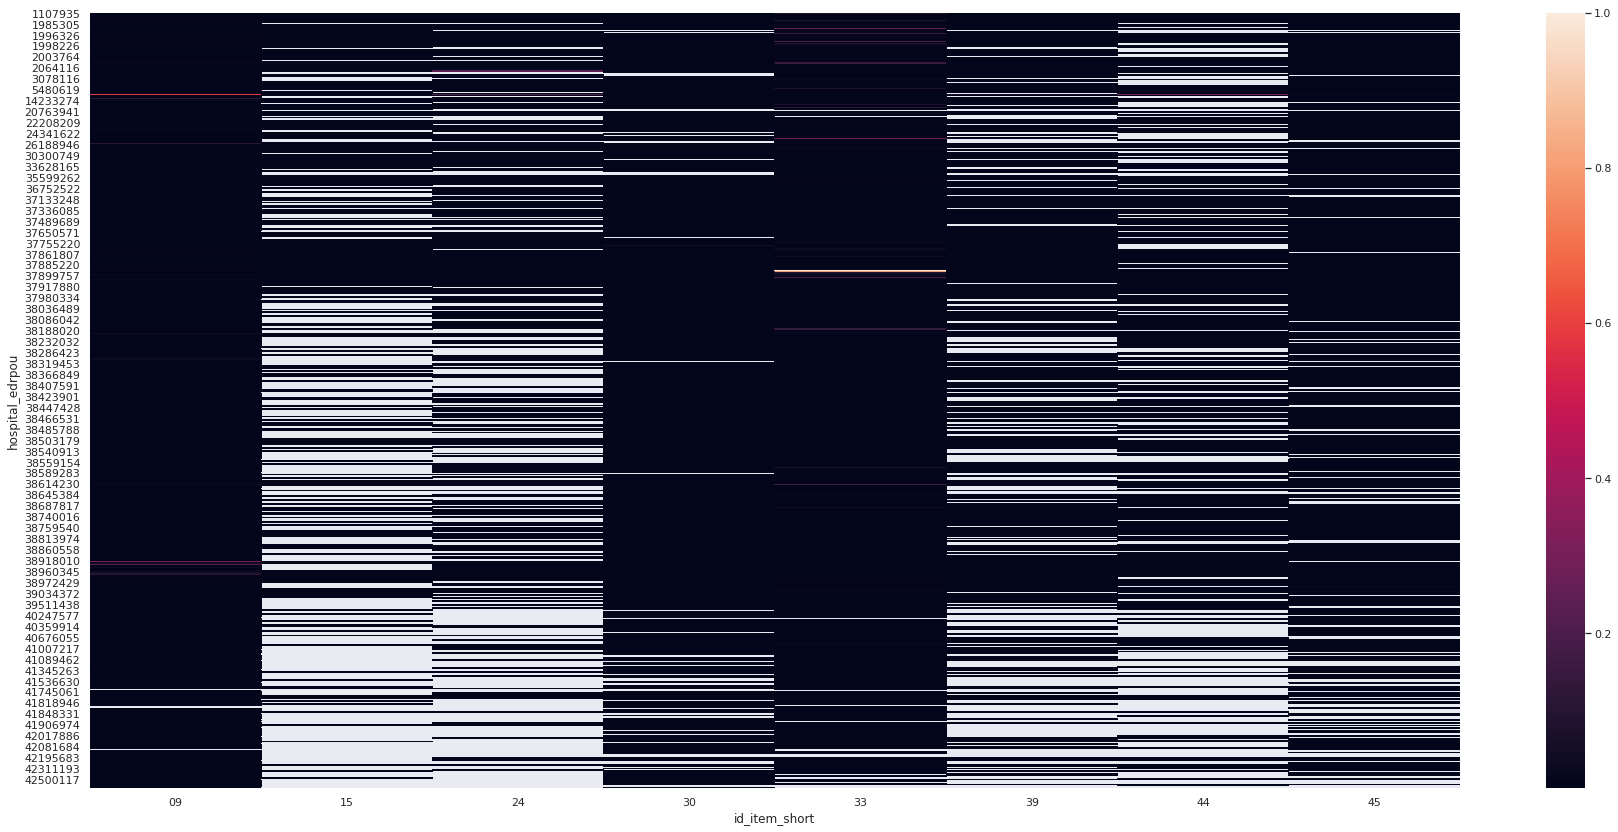

In [22]:
>>> import numpy as np; np.random.seed(0)
>>> import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(30.7,14.27)})


>>> ax = sns.heatmap(a.pivot('hospital_edrpou', 'id_item_short', 'sum'))
ax

In [22]:
most_money = prozorro[['item_description', 'sum']].groupby(['item_description']).sum()

most_money.sort_values(by='sum', ascending=False)

,sum
item_description,
Фармацевтична продукція,1.220563e+10
"Пара, гаряча вода та пов’язана продукція",5.132637e+09
Газове паливо,1.648238e+09
Електрична енергія,1.495935e+09
"Візуалізаційне обладнання для потреб медицини, стоматології та ветеринарної медицини",8.917097e+08
Агрохімічна продукція,6.408921e+08
Основні неорганічні хімічні речовини,5.316687e+08
Нафта і дистиляти,4.984677e+08
Лікарські засоби різні,4.896000e+08


In [27]:
richest_hospitals = prozorro[['hospital_name', 'sum']].groupby(['hospital_name']).sum()

richest_hospitals.sort_values(by='sum', ascending=False)

,sum
hospital_name,
ПАТ СУМИХІМПРОМ,3.607404e+09
"КУ ""Комунальний заклад ""Дніпропетровський центр первинної медико-санітарної допомоги № 5""""",2.473193e+09
"КЗ ""Дніпровський центр первинної медико-санітарної допомоги № 9""",1.997552e+09
"Комунальне некомерційне підприємство ""Центр первинної медико-санітарної допомоги №1"" Голосіївського району м. Києва",8.072839e+08
КОМУНАЛЬНА УСТАНОВА «ЦЕНТР ПЕРВИННОЇ МЕДИКО-САНІТАРНОЇ ДОПОМОГИ № 18»,6.805635e+08
Івано-Франківська міська поліклініка №4,6.801762e+08
"КОМУНАЛЬНИЙ ЗАКЛАД ""ДНІПРОВСЬКИЙ ЦЕНТР ПЕРВИННОЇ МЕДИКО-САНІТАРНОЇ ДОПОМОГИ №10""",6.193263e+08
"Комунальне некомерційне підприємство ""Центр первинної медико-санітарної допомоги №3"" Шевченківського району міста Києва",5.450158e+08
Косівська центральна районна лікарня,5.445238e+08


In [74]:
prozorro.hospital_edrpou.value_counts()

1982940     4824
37899715    2492
5766356     2192
37927092    2166
37899694    1494
2774556     1472
37899762    1309
2007532     1292
37944301    1220
14242161    1208
38319453    1188
37899741    1187
37899872    1170
40887956    1050
37899720    1042
38617509    1011
38969615    1010
1997633      996
37899888     987
1983814      934
37899778     930
37885278     912
37899708     912
1993546      898
38184885     861
38869194     814
37899736     792
5396876      769
22398210     753
37899757     696
            ... 
41789203       1
40241769       1
40284540       1
41835233       1
41055077       1
38248739       1
42080790       1
42408329       1
26353612       1
42448068       1
41894299       1
41072589       1
41894875       1
2002397        1
42303334       1
42346446       1
34815103       1
42184870       1
41536630       1
41803699       1
40204198       1
36749200       1
41103874       1
41738028       1
42318513       1
41160010       1
42072308       1
2774579       

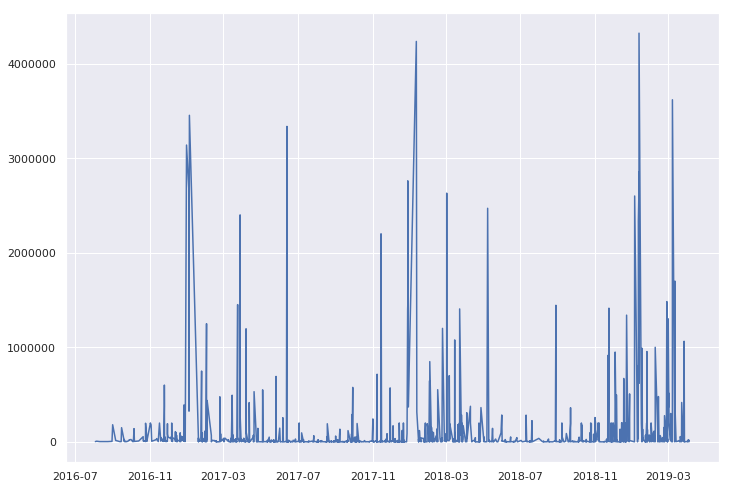

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("darkgrid")
plt.plot(temp['date'].values, temp['sum'].values)
plt.show()

In [88]:
temp = prozorro.loc[
    (prozorro.hospital_edrpou == 1982940) 
#     & 
#     (prozorro.date > pd.to_datetime('20180801', format='%Y%m%d', errors='ignore'))
]

In [89]:
temp = temp.sort_values(by='date', ascending=False).dropna()

# clustering

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np


prozorro = pd.read_json('data_short_line.json', dtype={'hospital_edrpou': 'str'})
prozorro.date = pd.to_datetime(prozorro.date)


In [4]:
clustering_data = pd.get_dummies(prozorro.id_item)
clustering_data['value'] = prozorro['sum']
clustering_data['date'] = list(map(lambda t: round(t.timestamp()) if pd.notnull(t) else t, prozorro.date.values))

clustering_data['date'] = clustering_data.date/clustering_data.date.max()
clustering_data['value'] = prozorro['sum']/prozorro['sum'].max()

clustering_data = clustering_data.dropna()

In [5]:
import umap.umap_ as umap
# from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import seaborn as sns

# try this https://jlmelville.github.io/uwot/abparams.html

sns.set(context="paper", style="white")


reducer = umap.UMAP(
#     n_neighbors=50,
      a = 100,
      b = 0.1
#     spread=1,
#     min_dist=0.001
#     n_components=2,
#     random_state=1000,
)
embedding = reducer.fit_transform(clustering_data)



/home/ptrbdr/files/medical_reform/env/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 146 separate connected components using meta-embedding (experimental)
  n_components
/home/ptrbdr/files/medical_reform/env/lib/python3.5/site-packages/umap/spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/home/ptrbdr/files/medical_reform/env/lib/python3.5/site-packages/umap/spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


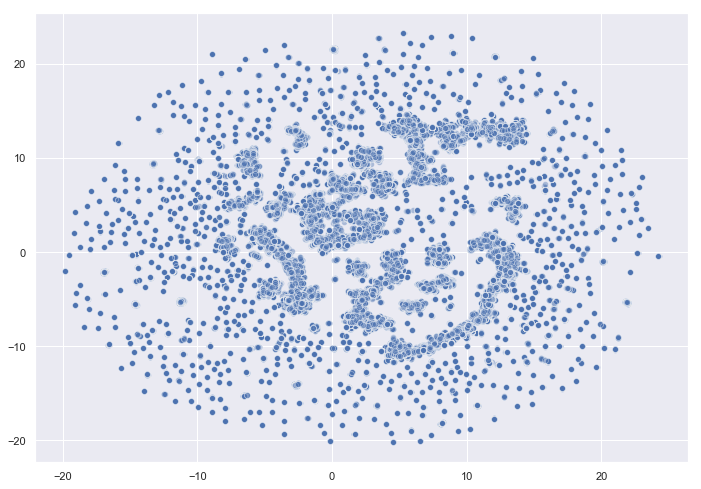

In [6]:
import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
ax = sns.scatterplot(x=embedding[:,1], y=embedding[:,0], 
#                      hue=winner_2,
#                        hue=regions,
#                      palette=sns.color_palette("Set1", number),
                     alpha=0.4
                    )



